폴더에 있는 파일들을 colab에 업로드 해주어야 합니다.

프로그램 파일 : best.pt, FMbest.hdf5, detect_sub.py

이미지 파일 : 100052.jpg, 100054.jpg, 100055.jpg, 100062.jpg, search.pastatic.jpg (예측을 진행할 다른 이미지도 추가할수 있습니다.)

# 객체 탐지 및 세부분류를 위한 모델 아키텍쳐 생성

In [ ]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten
from keras.models import Sequential

model=Sequential()
model.add(Input((224,224,3)))
model.add(Conv2D(32,3,padding='same',activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64,3,padding='same',activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(128,3,padding='same',activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(256,3,padding='same',activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(512,3,activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(7,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

In [ ]:
#YOLOv5를 사용하기 위해 git에서 다운로드
%cd /content
!git clone https://github.com/ultralytics/yolov5.git

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 9877, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 9877 (delta 40), reused 26 (delta 11), pack-reused 9801
Receiving objects: 100% (9877/9877), 10.34 MiB | 29.33 MiB/s, done.
Resolving deltas: 100% (6827/6827), done.


# YOLO 모델 구동을 위한 환경설정

In [ ]:
#YOLOv5를 구동하기 위환 환경설정
%cd /content/yolov5
!pip install -r requirements.txt

/content/yolov5
     |████████████████████████████████| 596 kB 30.6 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


# 모델에 학습된 가중치 정보를 입력 후 예측 진행

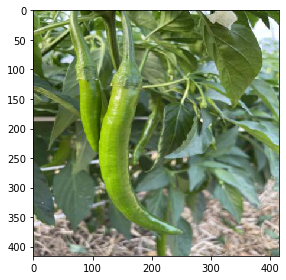

<Figure size 432x288 with 0 Axes>

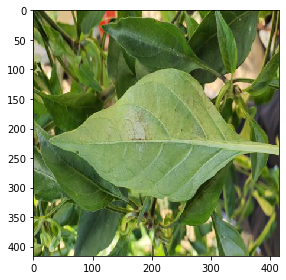

<Figure size 432x288 with 0 Axes>

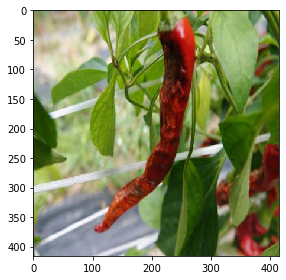

<Figure size 432x288 with 0 Axes>

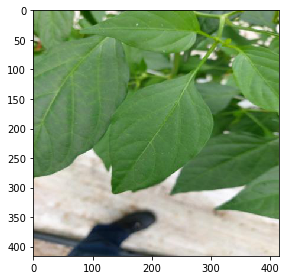

<Figure size 432x288 with 0 Axes>

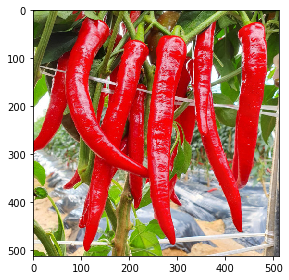

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
from skimage import io
from glob import glob
#객체 탐지 할 이미지 출력
images_path=glob('/content/*.jpg')

for val_img_path in images_path:
  image=io.imread(val_img_path)
  io.imshow(image)
  fig=plt.figure()
  plt.show()

YOLOv5 🚀 v6.0-83-g6903251 torch 1.9.0+cu111 CPU

Fusing layers... 
Model Summary: 213 layers, 7099126 parameters, 0 gradients, 16.1 GFLOPs
image 1/1 /content/100054.jpg: 416x416 1 pepper_normal, Done. (0.176s)
Speed: 1.6ms pre-process, 176.0ms inference, 15.3ms NMS per image at shape (1, 3, 416, 416)
Results saved to ../runs/detect/pred


###pepper_normal 0.81
###[108.0, 98.0, 251.0, 388.0]
/content/runs/detect/pred/f100054.jpg


YOLOv5 🚀 v6.0-83-g6903251 torch 1.9.0+cu111 CPU

Fusing layers... 
Model Summary: 213 layers, 7099126 parameters, 0 gradients, 16.1 GFLOPs
image 1/1 /content/100062.jpg: 416x416 1 pepper_disease2, Done. (0.160s)
Speed: 1.0ms pre-process, 159.6ms inference, 0.7ms NMS per image at shape (1, 3, 416, 416)
Results saved to ../runs/detect/pred2


###pepper_disease2 0.93
###[17.0, 100.0, 364.0, 324.0]
/content/runs/detect/pred2/f100062.jpg


YOLOv5 🚀 v6.0-83-g6903251 torch 1.9.0+cu111 CPU

Fusing layers... 
Model Summary: 213 layers, 7099126 parameters, 0 gradients, 16.1 GFLOPs
image 1/1 /content/100055.jpg: 416x416 1 pepper_disease1, Done. (0.164s)
Speed: 0.9ms pre-process, 163.9ms inference, 0.9ms NMS per image at shape (1, 3, 416, 416)
Results saved to ../runs/detect/pred3


###pepper_disease1 0.75
###[105.0, 6.0, 278.0, 390.0]
/content/runs/detect/pred3/f100055.jpg


YOLOv5 🚀 v6.0-83-g6903251 torch 1.9.0+cu111 CPU

Fusing layers... 
Model Summary: 213 layers, 7099126 parameters, 0 gradients, 16.1 GFLOPs
image 1/1 /content/100052.jpg: 416x416 2 pepper_normals, Done. (0.161s)
Speed: 1.5ms pre-process, 161.2ms inference, 0.8ms NMS per image at shape (1, 3, 416, 416)
Results saved to ../runs/detect/pred4


###pepper_normal 0.78
###[0.0, 45.0, 168.0, 298.0]
###pepper_normal 0.95
###[124.0, 110.0, 307.0, 313.0]
/content/runs/detect/pred4/f100052.jpg


YOLOv5 🚀 v6.0-83-g6903251 torch 1.9.0+cu111 CPU

Fusing layers... 
Model Summary: 213 layers, 7099126 parameters, 0 gradients, 16.1 GFLOPs
image 1/1 /content/search.pstatic.jpg: 416x416 1 Peach leaf, 1 pepper_disease1, Done. (0.167s)
Speed: 0.6ms pre-process, 166.7ms inference, 0.8ms NMS per image at shape (1, 3, 416, 416)
Results saved to ../runs/detect/pred5


###Peach leaf 0.16
###[0.0, 0.0, 56.0, 249.0]
###pepper_disease1 0.21
###[235.0, 61.0, 302.0, 479.0]
/content/runs/detect/pred5/fsearch.pstatic.jpg


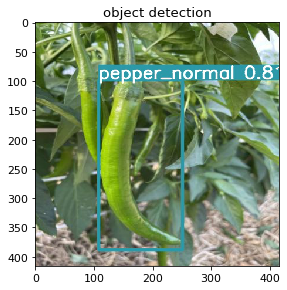

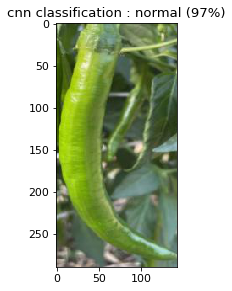

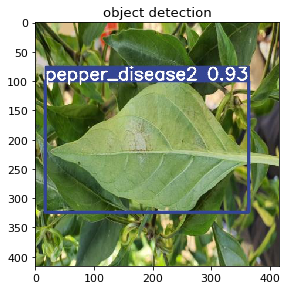

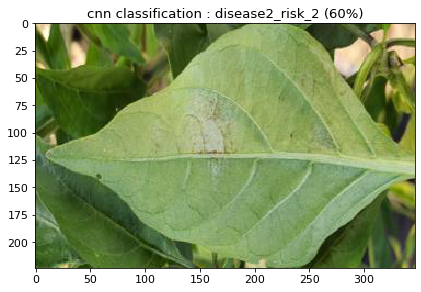

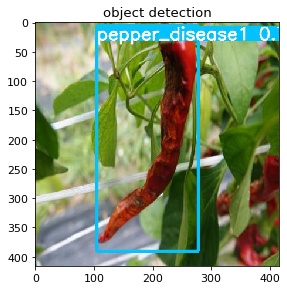

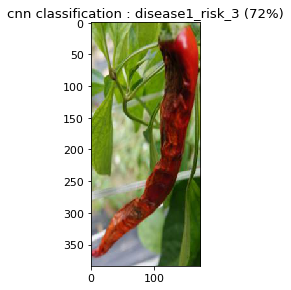

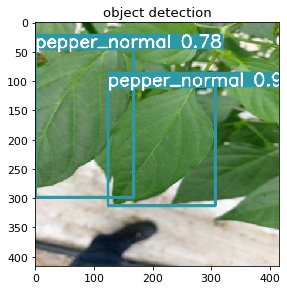

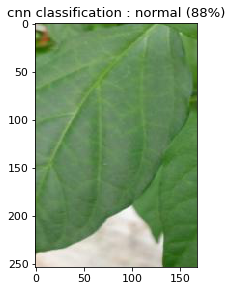

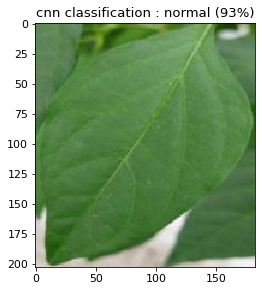

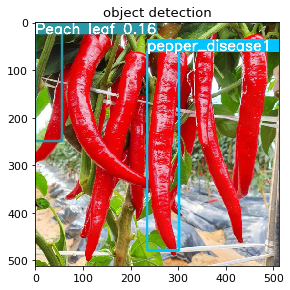

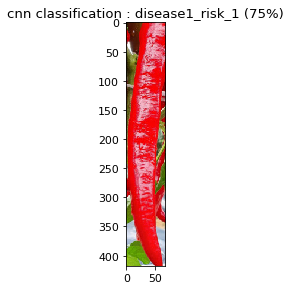

In [ ]:
from skimage.transform import resize
import numpy as np
import os
from detect_sub import run

pred_labels=['normal','disease1_risk_1','disease1_risk_2','disease1_risk_3','disease2_risk_1','disease2_risk_2','disease2_risk_3']
images_path=glob('/content/*.jpg')
img_size= 416
conf_th = 0.1

for val_img_path in images_path:

  #학습된 모델을 이용하여 객체인식을 진행
  results,path=run(conf_thres=conf_th,imgsz=[img_size, img_size],name='pred',source=val_img_path, weights=['/content/best.pt'])

  print(f'/content/{str(path).split("../")[1]}/f{os.path.basename(val_img_path)}')
  image=io.imread(f'/content/{str(path).split("../")[1]}/{os.path.basename(val_img_path)}')
  fig=plt.figure()
  io.imshow(image)
  plt.title(f"object detection")
  plt.show()

  model.load_weights('/content/FMbest.hdf5')
  #탐지된 개체에서 pepper가 탐지되었을 경우 세부 분류를 진행
  objs,ps = results

  pred_results=[]
  for obj,p in zip(objs,ps):
    obj=obj.split(' ')
    p=np.array(p).astype('int')
    if 'pepper' in obj[0]:
      fig=plt.figure()
      image=io.imread(val_img_path)
      image=image[p[1]:p[3],p[0]:p[2],:] #탐지된 구역으로 이미지를 자름
      io.imshow(image)
      
      image=resize(image,(224,224)) #CNN 분류모델에 사용가능한 사이즈로 변경
      a=[]
      a.append(image)
      image=np.array(a)
      if np.max(image)>1:
        image=image/255
      result=model.predict(image)
      #탐지된 객체의 세부 분류 예측값을 이용한 라벨링
      index=result[0].argmax()
      
      plt.title(f"cnn classification : {pred_labels[index]} ({round(result[0].max()*100)}%)")
      plt.show()